<a href="https://colab.research.google.com/github/Moaziz667/USA_Pollution_DataAnalytics/blob/main/dataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

folder_path = '/content/drive/MyDrive/data_project'

if os.path.exists(folder_path):
    print(f"Contents of '{folder_path}':")
    for item in os.listdir(folder_path):
        print(item)
else:
    print(f"Folder '{folder_path}' not found.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of '/content/drive/MyDrive/data_project':
pollution_us_2000_2016.csv
zip_code_demographics.csv


In [30]:
pollution_df = pd.read_csv('/content/drive/MyDrive/data_project/pollution_us_2000_2016.csv')
zip_code_df = pd.read_csv('/content/drive/MyDrive/data_project/zip_code_demographics.csv')

pollution_df.info()
zip_code_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

## Identify columns with missing values


In [31]:
missing_counts = pollution_df.isnull().sum()
missing_percentages = (missing_counts / len(pollution_df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

print("Missing values information for pollution_df:")
display(missing_info[missing_info['Missing Count'] > 0])

Missing values information for pollution_df:


,Missing Count,Missing Percentage
SO2 AQI,872907,49.975754
CO AQI,873323,49.999571


## Analyze missingness by location


In [32]:
so2_missing_by_state = pollution_df.groupby('State')['SO2 AQI'].apply(lambda x: x.isnull().mean()).sort_values(ascending=False)
co_missing_by_state = pollution_df.groupby('State')['CO AQI'].apply(lambda x: x.isnull().mean()).sort_values(ascending=False)

print("Top states with highest proportion of missing SO2 AQI values:")
display(so2_missing_by_state.head())

print("\nTop states with highest proportion of missing CO AQI values:")
display(co_missing_by_state.head())

Top states with highest proportion of missing SO2 AQI values:


,SO2 AQI
State,
Alaska,0.5
Arkansas,0.5
Delaware,0.5
Florida,0.5
Georgia,0.5



Top states with highest proportion of missing CO AQI values:


,CO AQI
State,
Minnesota,0.507307
Tennessee,0.500514
Rhode Island,0.500316
Nevada,0.500309
South Dakota,0.500241


Calculate the proportion of missing values for 'SO2 AQI' and 'CO AQI' grouped by 'State' and 'City', sort in descending order, and display the top state-city combinations.

In [33]:
so2_missing_by_state_city = pollution_df.groupby(['State', 'City'])['SO2 AQI'].apply(lambda x: x.isnull().mean()).sort_values(ascending=False)
co_missing_by_state_city = pollution_df.groupby(['State', 'City'])['CO AQI'].apply(lambda x: x.isnull().mean()).sort_values(ascending=False)

print("Top State-City combinations with highest proportion of missing SO2 AQI values:")
display(so2_missing_by_state_city.head())

print("\nTop State-City combinations with highest proportion of missing CO AQI values:")
display(co_missing_by_state_city.head())

Top State-City combinations with highest proportion of missing SO2 AQI values:


State       City             
Alaska      Fairbanks            0.5
California  Berkeley             0.5
            Benicia              0.5
            Bakersfield          0.5
Arkansas    North Little Rock    0.5
Name: SO2 AQI, dtype: float64


Top State-City combinations with highest proportion of missing CO AQI values:


State       City       
Minnesota   Blaine         0.507307
California  Bakersfield    0.502304
New York    Rochester      0.501718
California  Victorville    0.500924
            Eureka         0.500574
Name: CO AQI, dtype: float64

Are the indexes normally distributed in this interval?

In [34]:
for col in ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']:
    if col in pollution_df.columns:
        print(col, pollution_df[col].min(), pollution_df[col].max())



NO2 AQI 0 132
O3 AQI 0 218
SO2 AQI 0.0 200.0
CO AQI 0.0 201.0


Number of Pollution Records per Year

<Axes: title={'center': 'Number of Records per Year'}, xlabel='year'>

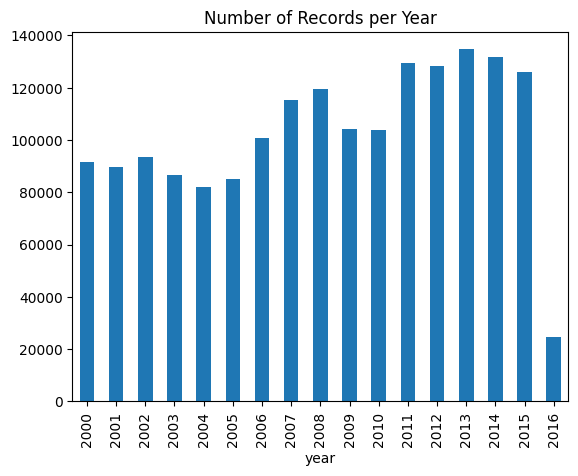

In [35]:
pollution_df['Date Local'] = pd.to_datetime(pollution_df['Date Local'], errors='coerce')
pollution_df['year'] = pollution_df['Date Local'].dt.year
pollution_df['month'] = pollution_df['Date Local'].dt.month

pollution_df.groupby('year').size().plot(kind='bar', title="Number of Records per Year")


# **Fill missing SO2 AQI and CO AQI values with the mean value per state**

In [36]:
pollution_df['SO2 AQI'] = pollution_df.groupby('State')['SO2 AQI'].transform(lambda x: x.fillna(x.mean()))
pollution_df['CO AQI'] = pollution_df.groupby('State')['CO AQI'].transform(lambda x: x.fillna(x.mean()))

## removing the 'City' column

In [37]:
v2_pollution_df = v2_pollution_df.drop(columns=['City'])

print("DataFrame after removing the 'City' column:")
display(v2_pollution_df.head())

DataFrame after removing the 'City' column:


,State,County,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,Maricopa,2000-01-01,19.041667,46,0.022500,34,3.000000,13.000000,1.145833,9.191023
1,Arizona,Maricopa,2000-01-01,19.041667,46,0.022500,34,3.000000,13.000000,0.878947,25.000000
2,Arizona,Maricopa,2000-01-01,19.041667,46,0.022500,34,2.975000,4.213486,1.145833,9.191023
3,Arizona,Maricopa,2000-01-01,19.041667,46,0.022500,34,2.975000,4.213486,0.878947,25.000000
4,Arizona,Maricopa,2000-01-02,22.958333,34,0.013375,27,1.958333,4.000000,0.850000,9.191023


# Create a cleaned version of the dataset by dropping irrelevant columns
# (IDs, codes, addresses, units, and intermediate calculation fields)




In [38]:
columns_to_drop = [
    'Unnamed: 0',
    'State Code',
    'County Code',
    'Site Num',
    'Address',
    'NO2 Units',
    'O3 Units',
    'SO2 Units',
    'CO Units',
    'month',
    'year',
    'NO2 1st Max Value',
    'NO2 1st Max Hour',
    'O3 1st Max Value',
    'O3 1st Max Hour',
    'SO2 1st Max Value',
    'SO2 1st Max Hour',
    'CO 1st Max Value',
    'CO 1st Max Hour'
]

v2_pollution_df = pollution_df.copy()
v2_pollution_df.drop(columns=columns_to_drop, inplace=True)
v2_pollution_df.tail(15)

,State,County,City,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
1746646,Wyoming,Laramie,Not in a city,2016-03-28,8.317391,21,0.041292,48,0.117391,0.000000,0.100000,1.000000
1746647,Wyoming,Laramie,Not in a city,2016-03-28,8.317391,21,0.041292,48,0.100000,1.818056,0.069304,1.486047
1746648,Wyoming,Laramie,Not in a city,2016-03-28,8.317391,21,0.041292,48,0.100000,1.818056,0.100000,1.000000
1746649,Wyoming,Laramie,Not in a city,2016-03-29,2.564706,3,0.028000,37,0.143750,0.000000,0.045625,1.486047
1746650,Wyoming,Laramie,Not in a city,2016-03-29,2.564706,3,0.028000,37,0.143750,0.000000,0.006667,1.000000
1746651,Wyoming,Laramie,Not in a city,2016-03-29,2.564706,3,0.028000,37,0.120000,1.818056,0.045625,1.486047
1746652,Wyoming,Laramie,Not in a city,2016-03-29,2.564706,3,0.028000,37,0.120000,1.818056,0.006667,1.000000
1746653,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1,0.043917,44,0.016667,0.000000,0.101042,1.486047
1746654,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1,0.043917,44,0.016667,0.000000,0.091667,1.000000
1746655,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1,0.043917,44,0.000000,1.818056,0.101042,1.486047
